## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.056349
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.056349
1    0.057661
2    0.059667
3    0.059291
4    0.058190
5    0.069812
6    0.065604
7    0.060497
8    0.053289
9    0.067810
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    0.060817
dtype: float64

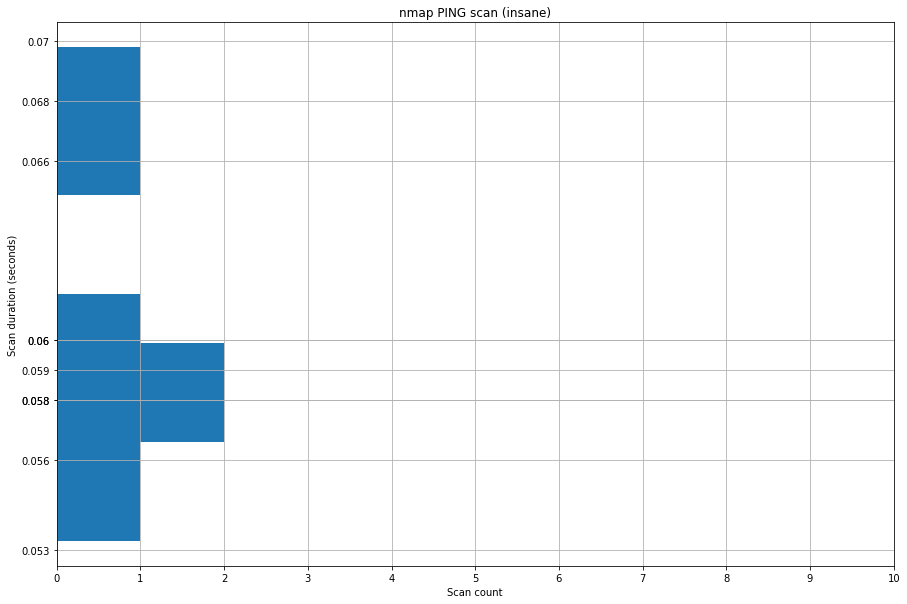

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,0.060817
std,0.005270
min,0.053289
25%,0.057793
50%,0.059479
75%,0.064327
max,0.069812


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1216.3410186767578



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 48274 22
2 48274 5900
3 48274 23
4 48274 80
5 48274 8888
6 48274 993
7 48274 143
8 48274 53
9 48274 3306
10 48274 587
11 48274 1723
12 48274 554
13 48274 111
14 48274 21
15 48274 1720
16 48274 25
17 48274 199
18 48274 3389
19 48274 256
20 48274 113
21 48274 135
22 48274 139
23 48274 110
24 48274 995
25 48274 443
26 48274 445
27 48274 1025
28 48274 8080
29 48274 4899
30 48274 10004
31 48274 4006
32 48274 49175
33 48274 8021
34 48274 2119
35 48274 514
36 48274 34573
37 48274 301
38 48274 6502
39 48274 9290
40 48274 1107
41 48274 5432
42 48274 64680
43 48274 1583
44 48274 4001
45 48274 714
46 48274 6901
47 48274 144
48 48274 8022
49 48274 2909
50 48274 3580
51 48274 9876
52 48274 19842
53 48274 625
54 48274 3476
55 48274 6005
56 48274 1090
57 48274 1096
58 48274 30951
59 48274 465
60 48274 4550
61 48274 6004
62 48274 9594
63 48274 60020
64 48274 1041
65 48274 1042
66 48274 801
67 48274 1183
68 48274 1130
69 48274 10778
70 48274 10621
71 48274 32774
72 48274 6566
73 48274 1039
74 48274 4

624 48274 4242
625 48274 306
626 48274 7741
627 48274 1121
628 48274 1998
629 48274 497
630 48274 7002
631 48274 5280
632 48274 1666
633 48274 49165
634 48274 2111
635 48274 1138
636 48274 1067
637 48274 1033
638 48274 5822
639 48274 52822
640 48274 1501
641 48274 32780
642 48274 6002
643 48274 2068
644 48274 25734
645 48274 13782
646 48274 8800
647 48274 26
648 48274 4567
649 48274 3945
650 48274 3261
651 48274 1122
652 48274 7496
653 48274 17988
654 48274 10566
655 48274 1072
656 48274 7200
657 48274 389
658 48274 2065
659 48274 617
660 48274 3800
661 48274 9998
662 48274 1059
663 48274 19801
664 48274 7402
665 48274 1234
666 48274 55555
667 48274 1010
668 48274 4446
669 48274 42
670 48274 5405
671 48274 2967
672 48274 3
673 48274 8088
674 48274 5050
675 48274 3283
676 48274 2190
677 48274 616
678 48274 57797
679 48274 1108
680 48274 3784
681 48274 9877
682 48274 49152
683 48274 15742
684 48274 4445
685 48274 6059
686 48274 8654
687 48274 8086
688 48274 9900
689 48274 10012
690 48274

237 39948 616
238 39948 2910
239 39948 5822
240 39948 3766
241 39948 10629
242 39948 2121
243 39948 1687
244 39948 3546
245 39948 6580
246 39948 5810
247 39948 16016
248 39948 1174
249 39948 8021
250 39948 13783
251 39948 1079
252 39948 1187
253 39948 32769
254 39948 2190
255 39948 9999
256 39948 1070
257 39948 9944
258 39948 2381
259 39948 3077
260 39948 7100
261 39948 4848
262 39948 427
263 39948 19
264 39948 27355
265 39948 3269
266 39948 5003
267 39948 49400
268 39948 1039
269 39948 6005
270 39948 10002
271 39948 17877
272 39948 1104
273 39948 5915
274 39948 3814
275 39948 83
276 39948 1137
277 39948 1494
278 39948 50003
279 39948 17
280 39948 2001
281 39948 711
282 39948 1501
283 39948 801
284 39948 2399
285 39948 7777
286 39948 44176
287 39948 14000
288 39948 8093
289 39948 8022
290 39948 9220
291 39948 5000
292 39948 808
293 39948 8008
294 39948 4445
295 39948 1085
296 39948 34571
297 39948 1038
298 39948 119
299 39948 4004
300 39948 3828
301 39948 51103
302 39948 33
303 39948 1

790 39948 1061
791 39948 5269
792 39948 4000
793 39948 6129
794 39948 1063
795 39948 1666
796 39948 99
797 39948 4005
798 39948 1099
799 39948 125
800 39948 1049
801 39948 497
802 39948 1000
803 39948 44443
804 39948 4003
805 39948 1761
806 39948 3580
807 39948 82
808 39948 2021
809 39948 1102
810 39948 1126
811 39948 3323
812 39948 1533
813 39948 10082
814 39948 2106
815 39948 900
816 39948 1031
817 39948 50800
818 39948 987
819 39948 63331
820 39948 700
821 39948 5815
822 39948 2608
823 39948 43
824 39948 6969
825 39948 2006
826 39948 9998
827 39948 50300
828 39948 42
829 39948 1072
830 39948 9503
831 39948 3221
832 39948 903
833 39948 48080
834 39948 32781
835 39948 2040
836 39948 3551
837 39948 5925
838 39948 1094
839 39948 617
840 39948 49153
841 39948 5102
842 39948 1352
843 39948 5544
844 39948 1580
845 39948 2003
846 39948 8192
847 39948 2010
848 39948 1046
849 39948 16018
850 39948 563
851 39948 20005
852 39948 9415
853 39948 593
854 39948 3005
855 39948 7
856 39948 5988
857 3

457 48175 1186
458 48175 5825
459 48175 1311
460 48175 1002
461 48175 1058
462 48175 2005
463 48175 3826
464 48175 32774
465 48175 1121
466 48175 1069
467 48175 3323
468 48175 5907
469 48175 20005
470 48175 7100
471 48175 1124
472 48175 2601
473 48175 2383
474 48175 687
475 48175 10025
476 48175 45100
477 48175 2103
478 48175 1113
479 48175 4
480 48175 9090
481 48175 34573
482 48175 2119
483 48175 10617
484 48175 1433
485 48175 2710
486 48175 1046
487 48175 3945
488 48175 50800
489 48175 667
490 48175 1594
491 48175 25734
492 48175 2065
493 48175 1126
494 48175 3077
495 48175 2047
496 48175 3211
497 48175 5952
498 48175 7777
499 48175 2000
500 48175 2043
501 48175 444
502 48175 44443
503 48175 1151
504 48175 3551
505 48175 10243
506 48175 7025
507 48175 8181
508 48175 1111
509 48175 5051
510 48175 1309
511 48175 880
512 48175 1100
513 48175 1521
514 48175 3006
515 48175 16012
516 48175 1244
517 48175 1533
518 48175 1009
519 48175 4662
520 48175 9200
521 48175 1021
522 48175 1296
523 48

123 58285 8000
124 58285 7741
125 58285 55555
126 58285 1010
127 58285 1029
128 58285 16001
129 58285 7627
130 58285 6789
131 58285 5815
132 58285 222
133 58285 1042
134 58285 10010
135 58285 1700
136 58285 5405
137 58285 1099
138 58285 2135
139 58285 1066
140 58285 125
141 58285 32773
142 58285 1038
143 58285 1100
144 58285 32776
145 58285 8400
146 58285 2035
147 58285 6129
148 58285 8701
149 58285 5226
150 58285 2602
151 58285 1600
152 58285 631
153 58285 1840
154 58285 2004
155 58285 6689
156 58285 2492
157 58285 1088
158 58285 2525
159 58285 9535
160 58285 4550
161 58285 7001
162 58285 9877
163 58285 6059
164 58285 15660
165 58285 5850
166 58285 8011
167 58285 5911
168 58285 49159
169 58285 1580
170 58285 33354
171 58285 1112
172 58285 4126
173 58285 3325
174 58285 38292
175 58285 1060
176 58285 61532
177 58285 6000
178 58285 1721
179 58285 6788
180 58285 7201
181 58285 211
182 58285 3826
183 58285 6005
184 58285 10000
185 58285 3000
186 58285 512
187 58285 1064
188 58285 992
189 5

790 58285 2557
791 58285 3001
792 58285 1311
793 58285 366
794 58285 3322
795 58285 3003
796 58285 2021
797 58285 2144
798 58285 2968
799 58285 1218
800 58285 5910
801 58285 27356
802 58285 2000
803 58285 30718
804 58285 4449
805 58285 5810
806 58285 12000
807 58285 9943
808 58285 34572
809 58285 2998
810 58285 389
811 58285 1217
812 58285 20222
813 58285 646
814 58285 1594
815 58285 90
816 58285 888
817 58285 481
818 58285 30951
819 58285 1300
820 58285 32772
821 58285 9091
822 58285 2920
823 58285 8291
824 58285 3493
825 58285 2500
826 58285 6346
827 58285 1089
828 58285 6006
829 58285 6003
830 58285 1078
831 58285 5550
832 58285 1287
833 58285 40911
834 58285 49158
835 58285 9998
836 58285 16018
837 58285 30000
838 58285 1782
839 58285 8009
840 58285 25735
841 58285 1090
842 58285 1071
843 58285 5560
844 58285 3517
845 58285 10180
846 58285 49167
847 58285 5009
848 58285 8180
849 58285 1123
850 58285 3905
851 58285 4998
852 58285 3809
853 58285 9071
854 58285 50001
855 58285 9090
85

456 60482 8291
457 60482 4001
458 60482 1111
459 60482 2013
460 60482 6112
461 60482 1072
462 60482 32785
463 60482 9101
464 60482 5550
465 60482 2717
466 60482 9998
467 60482 49160
468 60482 5862
469 60482 55056
470 60482 2033
471 60482 2065
472 60482 32776
473 60482 5102
474 60482 5730
475 60482 8000
476 60482 1521
477 60482 1805
478 60482 8180
479 60482 2604
480 60482 1028
481 60482 146
482 60482 301
483 60482 10628
484 60482 306
485 60482 3071
486 60482 20
487 60482 1277
488 60482 44176
489 60482 6666
490 60482 20005
491 60482 3404
492 60482 465
493 60482 259
494 60482 106
495 60482 161
496 60482 34573
497 60482 6792
498 60482 1091
499 60482 1104
500 60482 2809
501 60482 6001
502 60482 311
503 60482 4045
504 60482 3920
505 60482 2998
506 60482 1455
507 60482 62078
508 60482 44442
509 60482 10617
510 60482 50800
511 60482 3889
512 60482 6789
513 60482 6006
514 60482 1984
515 60482 7025
516 60482 61532
517 60482 125
518 60482 5802
519 60482 898
520 60482 25734
521 60482 4125
522 6048

123 51133 20000
124 51133 1148
125 51133 15004
126 51133 1524
127 51133 2869
128 51133 19842
129 51133 1301
130 51133 9090
131 51133 3221
132 51133 1700
133 51133 2105
134 51133 1287
135 51133 6881
136 51133 1272
137 51133 5678
138 51133 1038
139 51133 12345
140 51133 16016
141 51133 2005
142 51133 3659
143 51133 1352
144 51133 1098
145 51133 1583
146 51133 6156
147 51133 1974
148 51133 30718
149 51133 9099
150 51133 2811
151 51133 8649
152 51133 25735
153 51133 17988
154 51133 2003
155 51133 52673
156 51133 2006
157 51133 3168
158 51133 6669
159 51133 55600
160 51133 3071
161 51133 5190
162 51133 50006
163 51133 3390
164 51133 2020
165 51133 1010
166 51133 444
167 51133 1839
168 51133 990
169 51133 1154
170 51133 11110
171 51133 1166
172 51133 7512
173 51133 1131
174 51133 2557
175 51133 1322
176 51133 7001
177 51133 636
178 51133 7002
179 51133 4449
180 51133 5004
181 51133 6004
182 51133 1021
183 51133 50300
184 51133 7938
185 51133 1071
186 51133 4111
187 51133 1247
188 51133 14000

789 51133 2001
790 51133 4005
791 51133 1049
792 51133 19780
793 51133 5298
794 51133 1718
795 51133 1244
796 51133 668
797 51133 1300
798 51133 10000
799 51133 9535
800 51133 5432
801 51133 1494
802 51133 1309
803 51133 8022
804 51133 32784
805 51133 51103
806 51133 65389
807 51133 617
808 51133 8008
809 51133 6005
810 51133 9415
811 51133 3918
812 51133 10010
813 51133 60443
814 51133 58080
815 51133 5357
816 51133 7100
817 51133 4000
818 51133 3372
819 51133 683
820 51133 5962
821 51133 6000
822 51133 5811
823 51133 28201
824 51133 981
825 51133 32778
826 51133 9999
827 51133 9485
828 51133 4003
829 51133 2009
830 51133 9500
831 51133 3517
832 51133 4848
833 51133 3800
834 51133 4006
835 51133 5001
836 51133 2033
837 51133 49154
838 51133 1658
839 51133 79
840 51133 9917
841 51133 32
842 51133 1501
843 51133 7
844 51133 50000
845 51133 9207
846 51133 1070
847 51133 2608
848 51133 5214
849 51133 17877
850 51133 5080
851 51133 106
852 51133 465
853 51133 1063
854 51133 18988
855 51133

456 57852 3031
457 57852 3869
458 57852 3920
459 57852 44501
460 57852 9998
461 57852 2382
462 57852 1244
463 57852 1147
464 57852 4006
465 57852 548
466 57852 7920
467 57852 1166
468 57852 259
469 57852 3851
470 57852 1782
471 57852 14441
472 57852 89
473 57852 646
474 57852 1556
475 57852 1999
476 57852 26214
477 57852 4004
478 57852 3971
479 57852 254
480 57852 7019
481 57852 1096
482 57852 48080
483 57852 1169
484 57852 3551
485 57852 898
486 57852 8800
487 57852 407
488 57852 5822
489 57852 7004
490 57852 4445
491 57852 5225
492 57852 6901
493 57852 58080
494 57852 5102
495 57852 3323
496 57852 3268
497 57852 8010
498 57852 1107
499 57852 1045
500 57852 7777
501 57852 3007
502 57852 3800
503 57852 161
504 57852 8011
505 57852 8400
506 57852 6005
507 57852 1117
508 57852 54328
509 57852 3001
510 57852 2288
511 57852 10628
512 57852 2910
513 57852 3372
514 57852 2000
515 57852 1862
516 57852 55600
517 57852 27355
518 57852 1236
519 57852 2004
520 57852 5030
521 57852 6566
522 57852 

122 33147 70
123 33147 667
124 33147 1075
125 33147 9081
126 33147 2222
127 33147 4343
128 33147 3800
129 33147 1044
130 33147 1051
131 33147 3737
132 33147 61532
133 33147 10566
134 33147 2401
135 33147 2170
136 33147 31038
137 33147 1
138 33147 5666
139 33147 179
140 33147 5822
141 33147 6566
142 33147 1183
143 33147 49167
144 33147 44443
145 33147 1063
146 33147 2005
147 33147 1163
148 33147 3527
149 33147 2000
150 33147 1102
151 33147 5000
152 33147 593
153 33147 2725
154 33147 900
155 33147 4848
156 33147 51493
157 33147 311
158 33147 543
159 33147 2366
160 33147 873
161 33147 4279
162 33147 1034
163 33147 25734
164 33147 548
165 33147 84
166 33147 1060
167 33147 3945
168 33147 1999
169 33147 6001
170 33147 5998
171 33147 9001
172 33147 5999
173 33147 1097
174 33147 6005
175 33147 1119
176 33147 1037
177 33147 2301
178 33147 3322
179 33147 2809
180 33147 8899
181 33147 616
182 33147 4001
183 33147 1040
184 33147 631
185 33147 4002
186 33147 1082
187 33147 49176
188 33147 1309
189 

789 33147 2009
790 33147 3871
791 33147 5825
792 33147 9900
793 33147 3809
794 33147 1580
795 33147 705
796 33147 50006
797 33147 254
798 33147 8701
799 33147 2121
800 33147 1718
801 33147 8084
802 33147 987
803 33147 2042
804 33147 513
805 33147 119
806 33147 1187
807 33147 5550
808 33147 2007
809 33147 5959
810 33147 61900
811 33147 3031
812 33147 16018
813 33147 3828
814 33147 32768
815 33147 8007
816 33147 5679
817 33147 1033
818 33147 7627
819 33147 5952
820 33147 668
821 33147 5907
822 33147 8652
823 33147 6059
824 33147 1131
825 33147 10617
826 33147 55056
827 33147 691
828 33147 4242
829 33147 749
830 33147 3077
831 33147 666
832 33147 7512
833 33147 3269
834 33147 1009
835 33147 2068
836 33147 12265
837 33147 9485
838 33147 1164
839 33147 6779
840 33147 3827
841 33147 22939
842 33147 3211
843 33147 7004
844 33147 1010
845 33147 5030
846 33147 1104
847 33147 800
848 33147 14000
849 33147 7435
850 33147 5101
851 33147 30
852 33147 6668
853 33147 99
854 33147 9502
855 33147 4444


455 57348 5566
456 57348 1090
457 57348 55555
458 57348 1719
459 57348 5298
460 57348 9
461 57348 3001
462 57348 3007
463 57348 1213
464 57348 27352
465 57348 1036
466 57348 5200
467 57348 2323
468 57348 5960
469 57348 8873
470 57348 1030
471 57348 49155
472 57348 1805
473 57348 10566
474 57348 12265
475 57348 9002
476 57348 1434
477 57348 6881
478 57348 1145
479 57348 10617
480 57348 1033
481 57348 14000
482 57348 2366
483 57348 2875
484 57348 389
485 57348 64623
486 57348 9595
487 57348 898
488 57348 42510
489 57348 3221
490 57348 1021
491 57348 24444
492 57348 1104
493 57348 544
494 57348 1461
495 57348 1972
496 57348 2119
497 57348 6789
498 57348 1002
499 57348 7937
500 57348 6502
501 57348 9944
502 57348 990
503 57348 1070
504 57348 1503
505 57348 1521
506 57348 4000
507 57348 5190
508 57348 5815
509 57348 161
510 57348 7777
511 57348 3986
512 57348 497
513 57348 2045
514 57348 1524
515 57348 2033
516 57348 3
517 57348 6543
518 57348 2602
519 57348 9110
520 57348 20222
521 57348 1

122 61584 5877
123 61584 10082
124 61584 55055
125 61584 5811
126 61584 70
127 61584 1
128 61584 49400
129 61584 7025
130 61584 8001
131 61584 9999
132 61584 2100
133 61584 8292
134 61584 843
135 61584 4343
136 61584 10009
137 61584 340
138 61584 416
139 61584 8443
140 61584 10215
141 61584 50006
142 61584 4567
143 61584 15003
144 61584 65129
145 61584 49157
146 61584 5904
147 61584 16992
148 61584 30
149 61584 5440
150 61584 4444
151 61584 1972
152 61584 7443
153 61584 6839
154 61584 9081
155 61584 7002
156 61584 1192
157 61584 1503
158 61584 32775
159 61584 1082
160 61584 800
161 61584 3995
162 61584 5922
163 61584 10002
164 61584 543
165 61584 1037
166 61584 765
167 61584 1183
168 61584 900
169 61584 9290
170 61584 912
171 61584 20828
172 61584 259
173 61584 14442
174 61584 7937
175 61584 6106
176 61584 1031
177 61584 1717
178 61584 32779
179 61584 5054
180 61584 2638
181 61584 6789
182 61584 668
183 61584 6565
184 61584 2725
185 61584 31038
186 61584 1721
187 61584 9944
188 61584 7

788 61584 9535
789 61584 2047
790 61584 2105
791 61584 389
792 61584 666
793 61584 1058
794 61584 9485
795 61584 27000
796 61584 1092
797 61584 6666
798 61584 7512
799 61584 5120
800 61584 43
801 61584 8383
802 61584 5221
803 61584 2200
804 61584 1718
805 61584 2001
806 61584 48080
807 61584 27355
808 61584 3
809 61584 1040
810 61584 1113
811 61584 6510
812 61584 3007
813 61584 8222
814 61584 2010
815 61584 23502
816 61584 8084
817 61584 1900
818 61584 10778
819 61584 61532
820 61584 1501
821 61584 5555
822 61584 32783
823 61584 19801
824 61584 3372
825 61584 3784
826 61584 6059
827 61584 801
828 61584 50002
829 61584 2008
830 61584 41511
831 61584 1234
832 61584 4111
833 61584 14238
834 61584 1094
835 61584 3690
836 61584 1057
837 61584 903
838 61584 4321
839 61584 1300
840 61584 5633
841 61584 9929
842 61584 52869
843 61584 9595
844 61584 1186
845 61584 32781
846 61584 2393
847 61584 808
848 61584 5907
849 61584 60443
850 61584 1126
851 61584 4224
852 61584 711
853 61584 5033
854 615

In [14]:
orders_port

,scannr,sport,dport
0,1,48274,22
1,2,48274,5900
2,3,48274,23
3,4,48274,80
4,5,48274,8888
...,...,...,...
9995,996,61584,1165
9996,997,61584,179
9997,998,61584,58080
9998,999,61584,1500


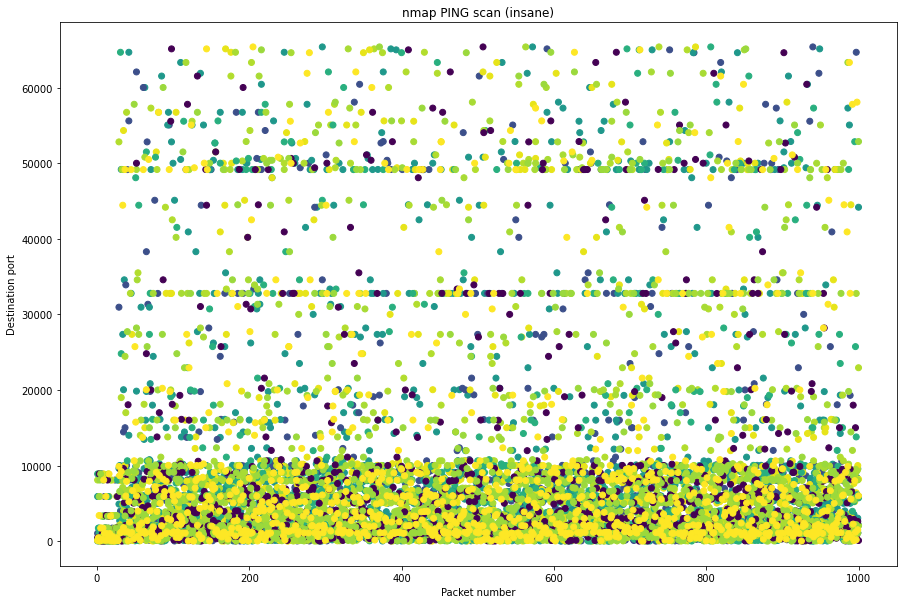

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

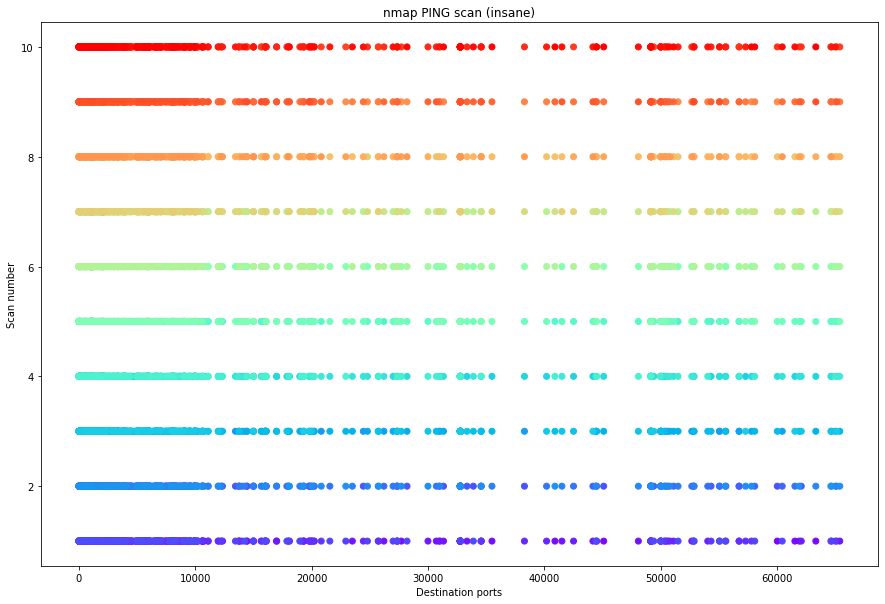

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

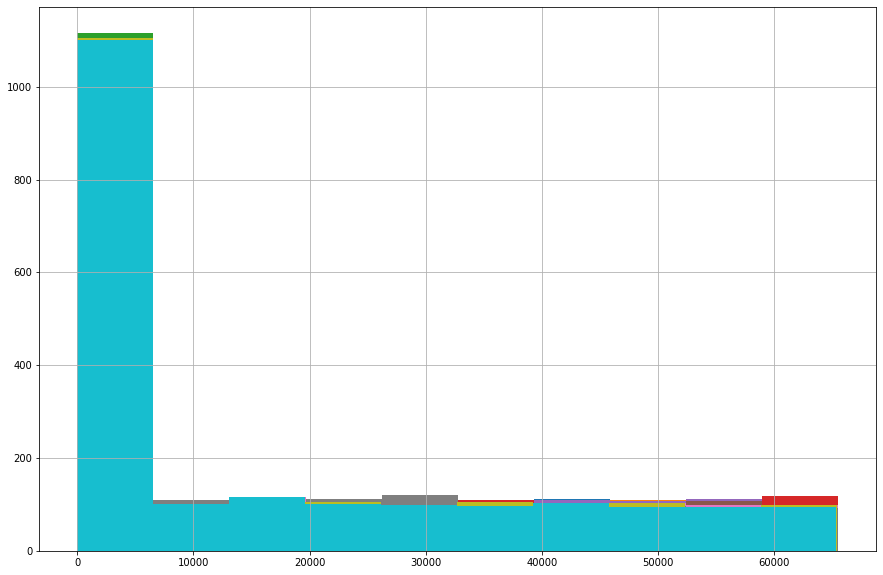

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

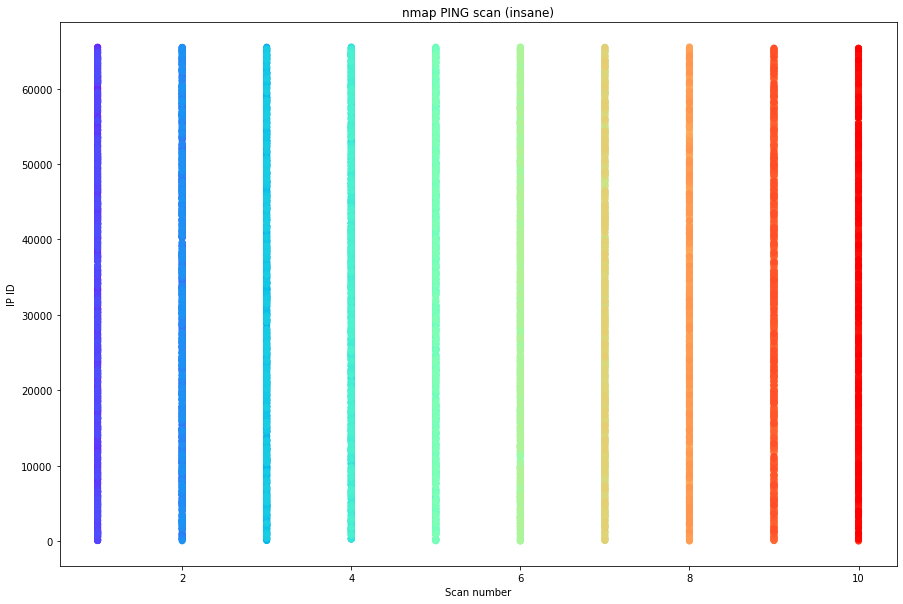

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


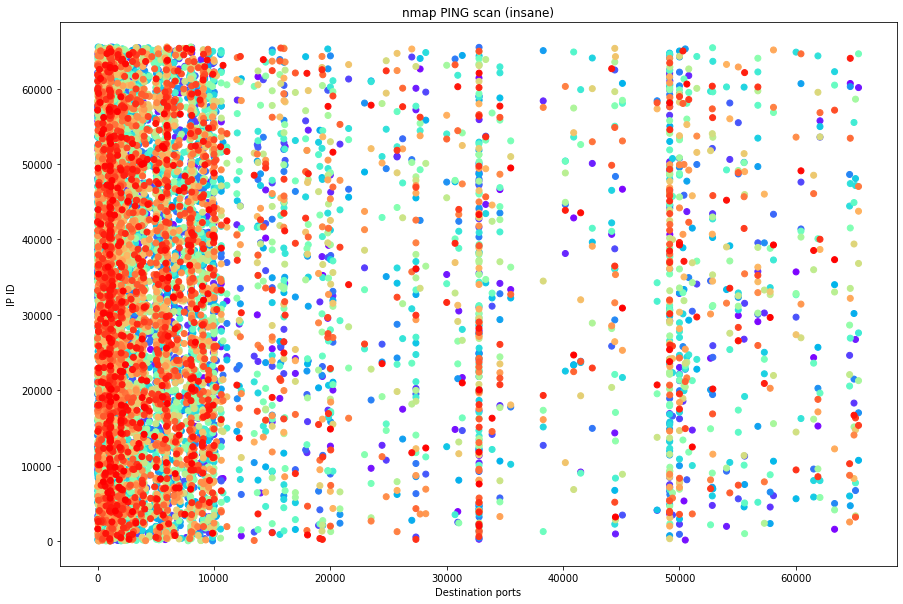

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

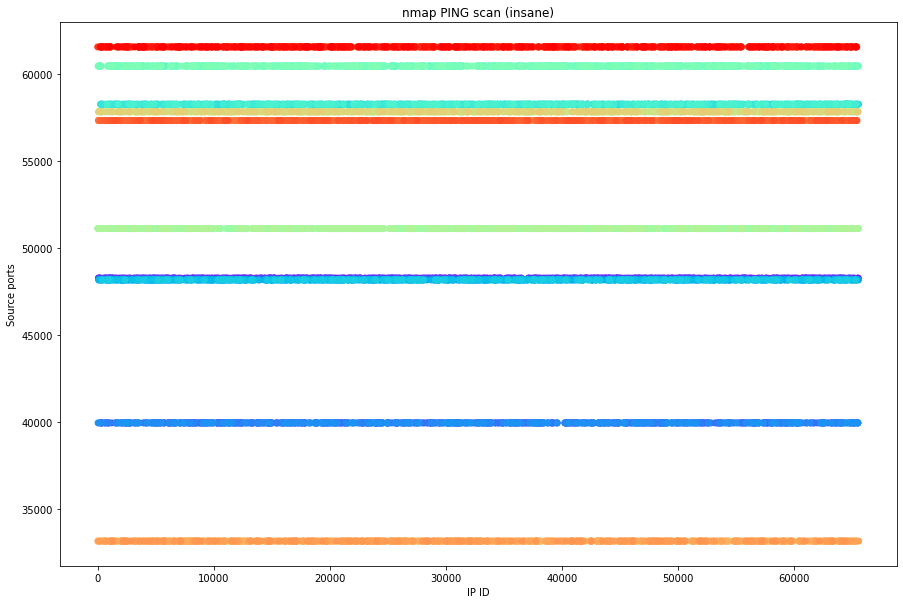

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 3288287548
Sequence number: 328

Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
S

Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
Sequence number: 874413394
S

Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 3078159623
Sequence number: 307

Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
S

Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
Sequence number: 218835305
S

Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 2231479978
Sequence number: 223

Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 359

Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 3593281896
Sequence number: 359

Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
Sequence number: 972844463
S

Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 222

Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 2220849442
Sequence number: 222

Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 1017162679
Sequence number: 101

Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
S

Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
Sequence number: 349839182
S

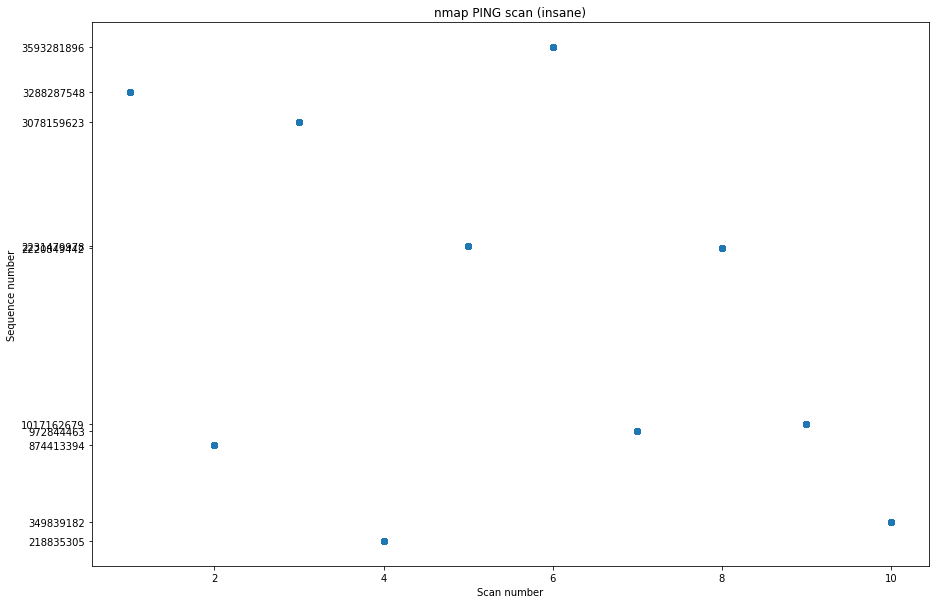

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


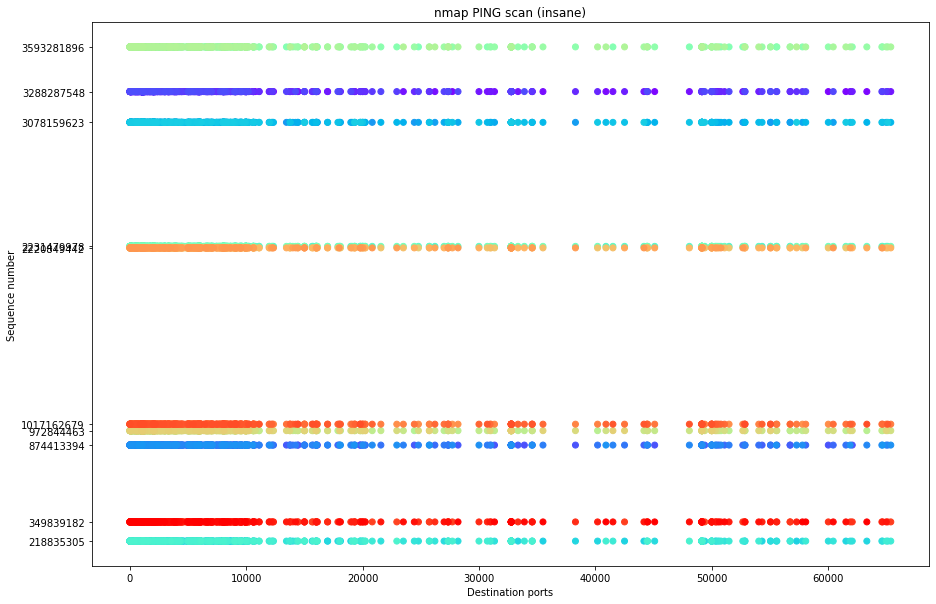

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

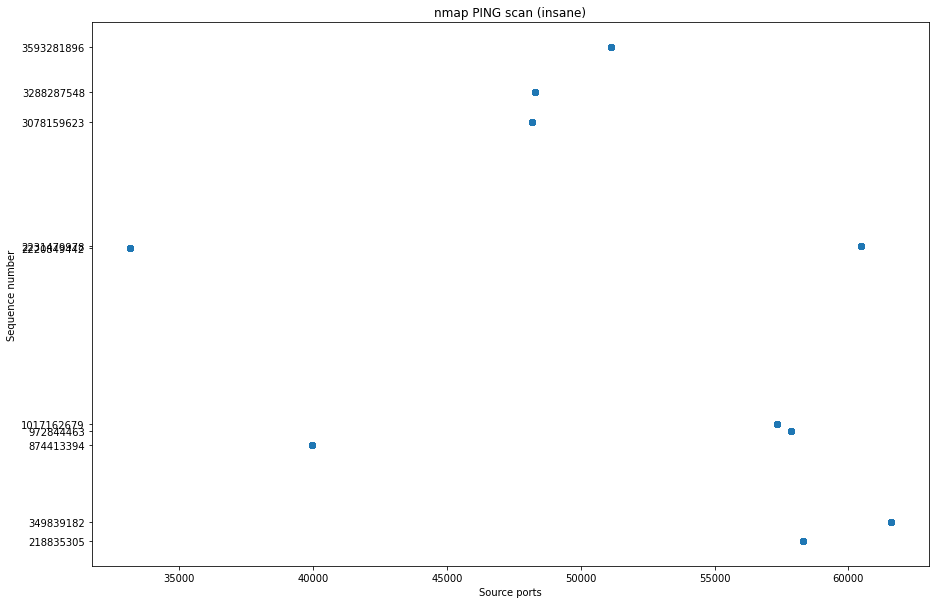

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

10

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F